In [173]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string as str

In [174]:
df =  pd.read_csv("World_Vaccination_Progress.csv")

In [175]:
df.tail(10)

,Country,Doses Administered,Doses per 1000,Fully Vaccinated Population (%),Vaccine being used in a country
176,Guinea-Bissau,25225,13.5,0.1,"Oxford/AstraZeneca, Sinopharm/Beijing"
177,Sint Maarten (Dutch part),24634,605.9,24.5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
178,Chad,24459,1.6,0.0,Sinopharm/Beijing
179,Andorra,19064,247.6,1.6,"Oxford/AstraZeneca, Pfizer/BioNTech"
180,Anguilla,13235,732.6,24.5,Oxford/AstraZeneca
181,Nauru,10556,830.9,24.0,Oxford/AstraZeneca
182,Wallis and Futuna,9112,576.4,28.5,Oxford/AstraZeneca
183,Bonaire Sint Eustatius and Saba,7391,275.7,6.2,"Moderna, Pfizer/BioNTech"
184,Falkland Islands,4322,1070.1,42.5,Oxford/AstraZeneca
185,Montserrat,1306,243.7,3.6,Oxford/AstraZeneca


In [176]:
df.isna().sum()

Country                            0
Doses Administered                 0
Doses per 1000                     0
Fully Vaccinated Population (%)    0
Vaccine being used in a country    1
dtype: int64

In [177]:
dfgdp = pd.read_csv("gdp-csv-.csv")

In [178]:
dfgdp.head(10)

,Unnamed: 0,Gross domestic product 2017,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"19,485,394",NaN,NaN,NaN,NaN,NaN,NaN
5,CHN,2,NaN,China,"12,237,700",NaN,NaN,NaN,NaN,NaN,NaN
6,JPN,3,NaN,Japan,"4,872,415",NaN,NaN,NaN,NaN,NaN,NaN
7,DEU,4,NaN,Germany,"3,693,204",NaN,NaN,NaN,NaN,NaN,NaN
8,IND,5,NaN,India,"2,650,725",NaN,NaN,NaN,NaN,NaN,NaN
9,GBR,6,NaN,United Kingdom,"2,637,866",NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
dfgdp2 = dfgdp[["Unnamed: 3","Unnamed: 4"]]

In [180]:
dfgdp2.rename(columns={"Unnamed: 3":"Country","Unnamed: 4":"GDP_US_Dollars"},inplace=True)

C:\Users\CASPER\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [181]:
dfgdp2.drop([0,1,2,3],axis=0,inplace=True)

C:\Users\CASPER\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [182]:
dfgdp2.head(15)

,Country,GDP_US_Dollars
4,United States,"19,485,394"
5,China,"12,237,700"
6,Japan,"4,872,415"
7,Germany,"3,693,204"
8,India,"2,650,725"
9,United Kingdom,"2,637,866"
10,France,"2,582,501"
11,Brazil,"2,053,595"
12,Italy,"1,943,835"
13,Canada,"1,647,120"


In [183]:
df.Country.value_counts()

Zimbabwe          1
Cayman Islands    1
Oman              1
Somalia           1
Japan             1
                 ..
Maldives          1
San Marino        1
Belgium           1
Samoa             1
Ukraine           1
Name: Country, Length: 186, dtype: int64

In [184]:
def str_check(df1,df2):
    result =[]
    for i in df1:
        for z in df2:
            if i==z:
                result.append(z)
    return result            

df ve dfgdp olmak üzere iki dataframe var elimde. Gdp verilerini merge etmeden önce, dfgdp2 deki ülke isimlerini df de aratarak aynı isimler olduğunu teyit ettikten sonra merge işlemini gerçekleştireceğim.

In [185]:
a = str_check(df.Country,dfgdp2.Country)
len(a)

155

In [186]:

dffinal = pd.merge(df, dfgdp2, how="left",on="Country") 

In [187]:
dffinal.head(20)

,Country,Doses Administered,Doses per 1000,Fully Vaccinated Population (%),Vaccine being used in a country,GDP_US_Dollars
0,Democratic Republic of Congo,73764,0.9,0.0,Oxford/AstraZeneca,NaN
1,World,3695131183,486.6,13.5,NaN,"80,934,771"
2,India,411846401,304.5,6.3,"Covaxin, Oxford/AstraZeneca, Sputnik V","2,650,725"
3,United States,338247434,1033.9,49.4,"Johnson&Johnson, Moderna, Pfizer/BioNTech","19,485,394"
4,Brazil,124906515,596.3,16.5,"Johnson&Johnson, Oxford / AstraZeneca, Oxford/...","2,053,595"
5,Germany,86520137,1043.3,46.8,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...","3,693,204"
6,United Kingdom,81702466,1228.8,53.5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","2,637,866"
7,Japan,71921254,568.4,22.4,"Moderna, Pfizer/BioNTech","4,872,415"
8,France,65579149,979.0,42.5,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...","2,582,501"
9,Turkey,63860891,775.8,25.7,"Pfizer/BioNTech, Sinovac","851,549"


In [188]:
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          186 non-null    object 
 1   Doses Administered               186 non-null    int64  
 2   Doses per 1000                   186 non-null    float64
 3   Fully Vaccinated Population (%)  186 non-null    float64
 4   Vaccine being used in a country  185 non-null    object 
 5   GDP_US_Dollars                   155 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 10.2+ KB


In [189]:
dffinal.GDP_US_Dollars.iloc[2]

' 2,650,725 '

In [190]:
dffinal = dffinal.dropna()

In [247]:
x = []
for i in dffinal.GDP_US_Dollars:
    z =i.replace("[","")
    t = z.replace("]","")
    x.append(t)
len(x)    

151

In [203]:
dffinal["GDP"]=x
dffinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 2 to 181
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          154 non-null    object 
 1   Doses Administered               154 non-null    int64  
 2   Doses per 1000                   154 non-null    float64
 3   Fully Vaccinated Population (%)  154 non-null    float64
 4   Vaccine being used in a country  154 non-null    object 
 5   GDP_US_Dollars                   154 non-null    object 
 6   GDP                              154 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 9.6+ KB


In [219]:
dffinal = dffinal.reset_index()

In [253]:
count = 0
while count <len(dffinal):
    if dffinal.GDP.iloc[count]==" " or dffinal.GDP.iloc[count]=="":
        dffinal.drop(count,axis = 0, inplace=True)
    count +=1    
    

In [249]:
new =[]
for i in dffinal.GDP:
    c=i.split()
    new.append(c)


AttributeError: 'list' object has no attribute 'split'

In [250]:
new2=[]
for i in new: 
    h= i.replace("[","")
    p=h.replace("]","")
    new2.append(p)

In [252]:
new2

[]

In [ ]:
for i in dffinal

In [246]:
dffinal.GDP.iloc[124]

['3775']

In [222]:
dffinal.drop(150,axis = 0, inplace=True)

In [230]:
dffinal.drop(124,axis = 0, inplace=True)

In [231]:
pd.to_numeric(dffinal.GDP)

ValueError: Unable to parse string "  " at position 123

#### dffinal.GDP_US_Dollars.iloc[2]

In [115]:
dffinal.corr()

,Doses Administered,Doses per 1000,Fully Vaccinated Population (%)
Doses Administered,1.000000,0.01268,-0.010156
Doses per 1000,0.012680,1.00000,0.965670
Fully Vaccinated Population (%),-0.010156,0.96567,1.000000


<AxesSubplot:>

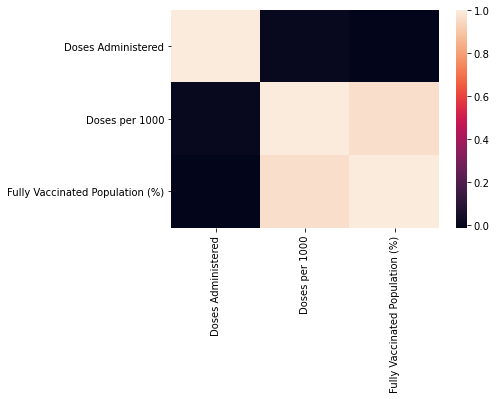

In [120]:
sns.heatmap(dffinal.corr())